# 📌 **Extracão**

In [157]:
import pandas as pd
import json
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **🔧 Transformação**

In [158]:
import requests

response = requests.get(url)
data = response.json()
dados = pd.json_normalize(data)
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [159]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [160]:
import numpy as np

col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('No','0'))
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,0,DSL,...,Yes,0,Yes,Yes,0,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,0,0,0,0,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,0,0,4,Yes,0,Fiber optic,...,0,Yes,0,0,0,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,0,13,Yes,0,Fiber optic,...,Yes,Yes,0,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,0,3,Yes,0,Fiber optic,...,0,0,Yes,Yes,0,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,0,DSL,...,0,0,Yes,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,0,22,Yes,Yes,Fiber optic,...,0,0,0,0,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,0,DSL,...,Yes,0,0,0,0,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,0,DSL,...,0,Yes,Yes,0,Yes,Two year,0,Mailed check,67.85,4627.65


In [161]:
col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Yes','1'))
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [162]:
col_numericas = ['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod','account.Charges.Total']
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Yes','1'))
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Female','1'))
dados[col_numericas] = dados[col_numericas].apply(lambda x: x.replace('Male','0'))
dados


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [163]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [164]:
dados['internet.InternetService'].str.lower()

,internet.InternetService
0,dsl
1,dsl
2,fiber optic
3,fiber optic
4,fiber optic
...,...
7262,dsl
7263,fiber optic
7264,dsl
7265,dsl


In [165]:
dados['internet.InternetService'] = dados['internet.InternetService'].str.lower()
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [166]:
col_textos=['account.Contract','account.PaymentMethod','phone.MultipleLines']
dados[col_textos] = dados[col_textos].apply(lambda x: x.str.lower())
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,1,0,1,1,0,one year,1,mailed check,65.60,593.3
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,0,1,month-to-month,0,mailed check,59.90,542.4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,1,0,0,0,month-to-month,1,electronic check,73.90,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,0,1,1,0,month-to-month,1,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,0,1,0,0,one year,0,mailed check,55.15,742.9
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,0,1,month-to-month,1,electronic check,85.10,1873.7
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,1,0,0,0,0,month-to-month,1,mailed check,50.30,92.75
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,0,1,1,0,1,two year,0,mailed check,67.85,4627.65


In [167]:
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')
dados['account.Charges.Monthly'] = pd.to_numeric(dados['account.Charges.Monthly'], errors='coerce')
dados['Contas_diarias'] = dados['account.Charges.Monthly']/30
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,1,0,0,one year,0,mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,0,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667


# 📊 **Carga** **e** **análise**

In [168]:
media = dados['Contas_diarias'].mean()
mediana = dados['Contas_diarias'].median()
desvio_padrao = dados['Contas_diarias'].std()
dados = dados.assign(media=media, mediana=mediana, desvio_padrao=desvio_padrao)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias,media,mediana,desvio_padrao
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,0,one year,1,mailed check,65.60,593.30,2.186667,2.157337,2.343333,1.004319
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,1,month-to-month,0,mailed check,59.90,542.40,1.996667,2.157337,2.343333,1.004319
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,0,month-to-month,1,electronic check,73.90,280.85,2.463333,2.157337,2.343333,1.004319
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,1,month-to-month,1,electronic check,98.00,1237.85,3.266667,2.157337,2.343333,1.004319
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,0,month-to-month,1,mailed check,83.90,267.40,2.796667,2.157337,2.343333,1.004319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,0,one year,0,mailed check,55.15,742.90,1.838333,2.157337,2.343333,1.004319
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,1,month-to-month,1,electronic check,85.10,1873.70,2.836667,2.157337,2.343333,1.004319
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,0,month-to-month,1,mailed check,50.30,92.75,1.676667,2.157337,2.343333,1.004319
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,1,two year,0,mailed check,67.85,4627.65,2.261667,2.157337,2.343333,1.004319


In [169]:
media_vals = dados['media'].unique()
mediana_vals = dados['mediana'].unique()
desvio_padrao_vals = dados['desvio_padrao'].unique()

print("Media:", media_vals)
print("mediana:", mediana_vals)
print("Desvio_padrao:", desvio_padrao_vals)

Media: [2.15733659]
mediana: [2.34333333]
Desvio_padrao: [1.00431906]


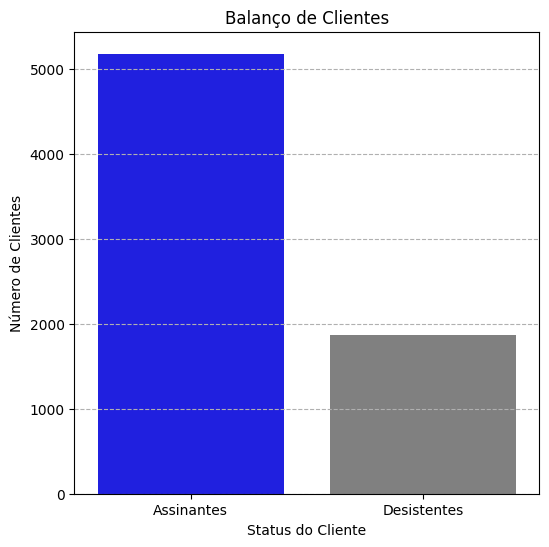

In [170]:

import seaborn as sns
import matplotlib.pyplot as plt


churn_counts = dados['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']


churn_counts['Churn'] = churn_counts['Churn'].map({'0': 'Assinantes', '1': 'Desistentes'})


plt.figure(figsize=(6, 6))
sns.barplot(x='Churn', y='Count', data=churn_counts, palette=['blue','gray'], hue='Churn', legend=False)
plt.title('Balanço de Clientes')
plt.xlabel('Status do Cliente')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--')
plt.savefig('balanco_clientes.png')
plt.show()


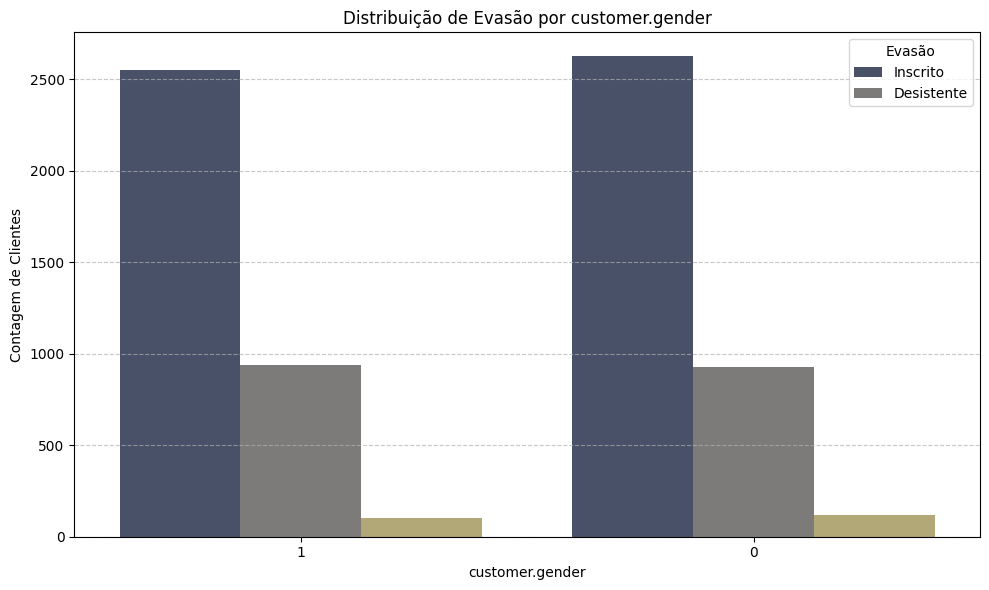

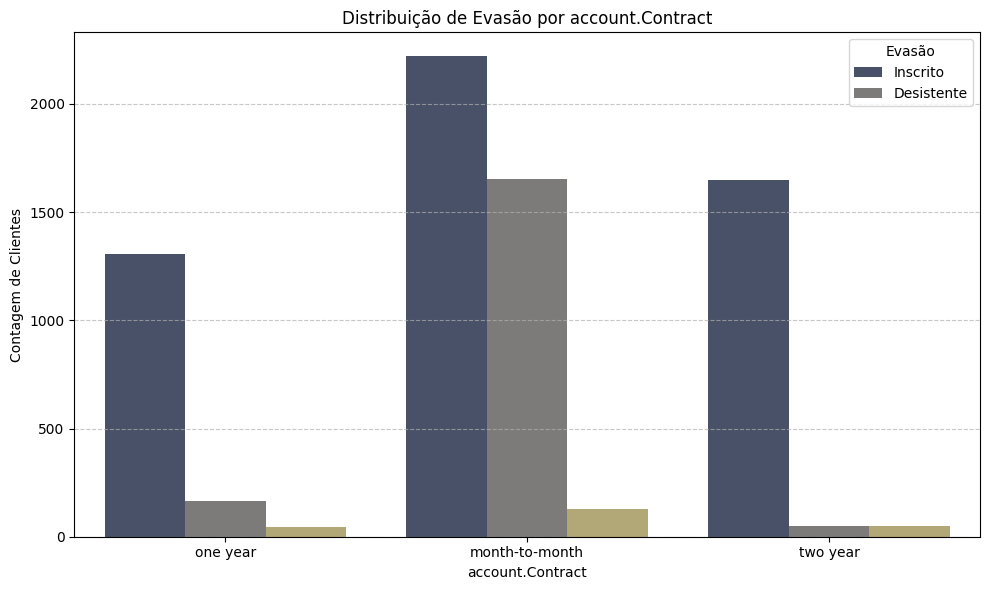

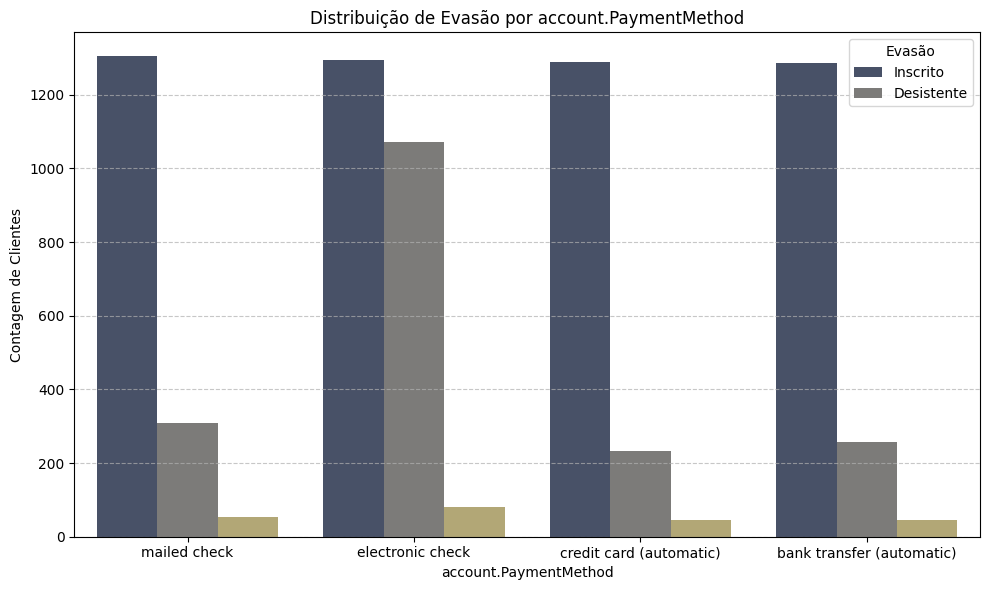

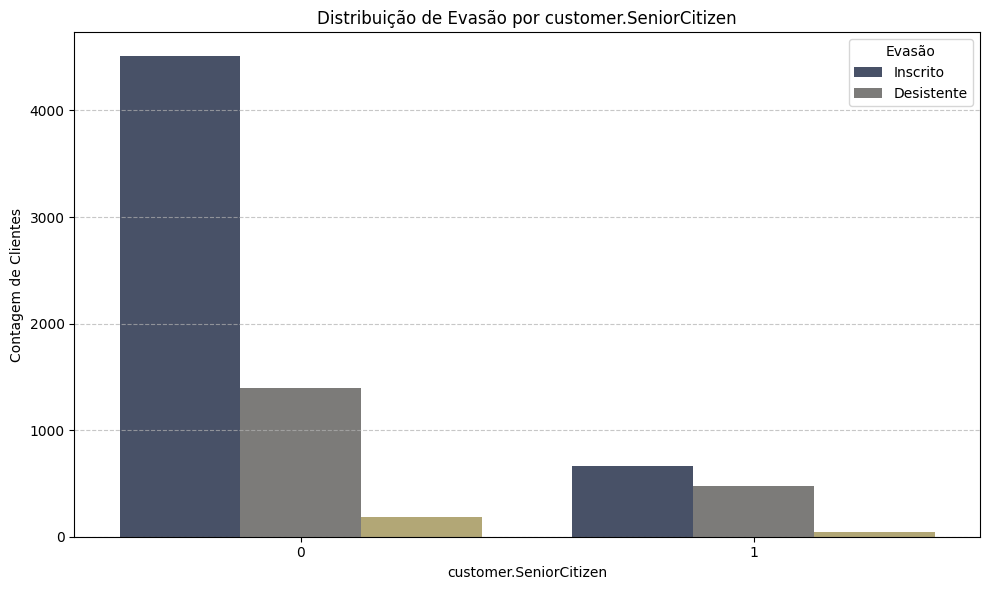

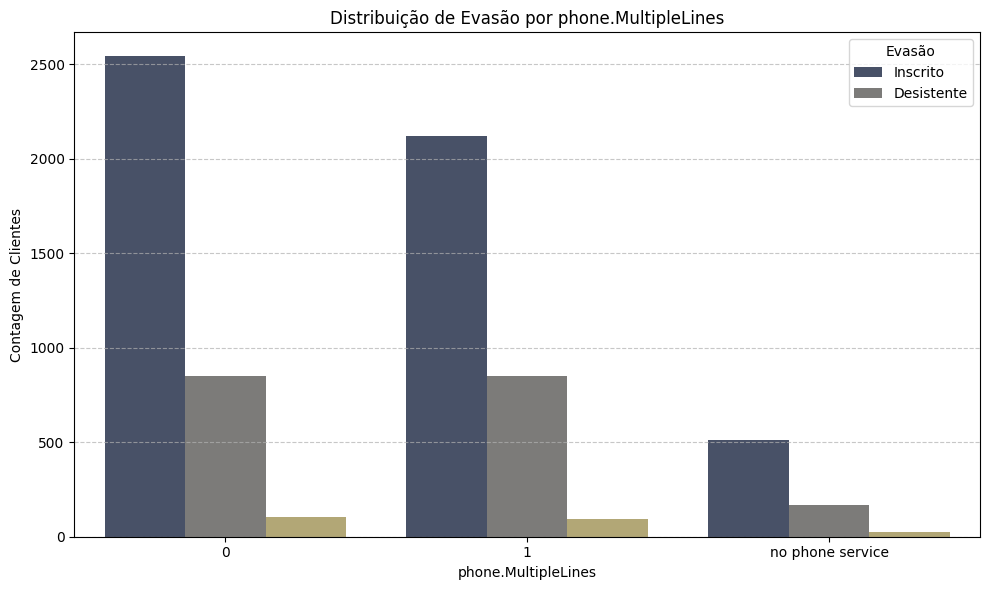

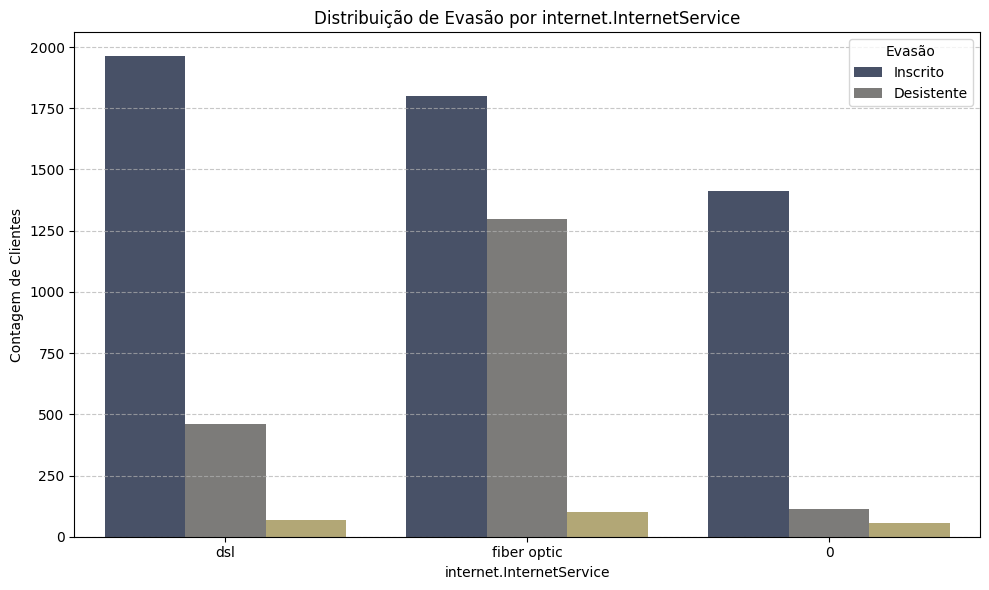

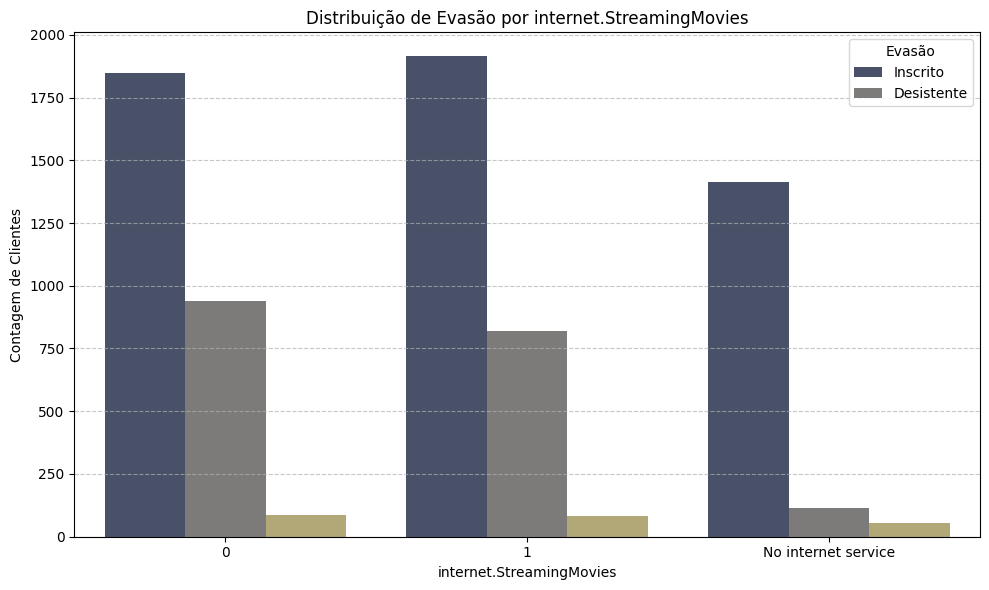

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

def save_plot(fig, filename):
    fig.savefig(filename, bbox_inches='tight')

categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod','customer.SeniorCitizen','phone.MultipleLines','internet.InternetService','internet.StreamingMovies']
for var in categorical_vars:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(data=dados, x=var, hue='Churn', palette='cividis', ax=ax)
    plt.title(f'Distribuição de Evasão por {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem de Clientes')
    plt.legend(title='Evasão', loc='upper right', labels=['Inscrito', 'Desistente'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    save_plot(fig, f'evasao_{var}.png')
    plt.close(fig)


from IPython.display import Image, display
for var in categorical_vars:
    display(Image(f'evasao_{var}.png'))

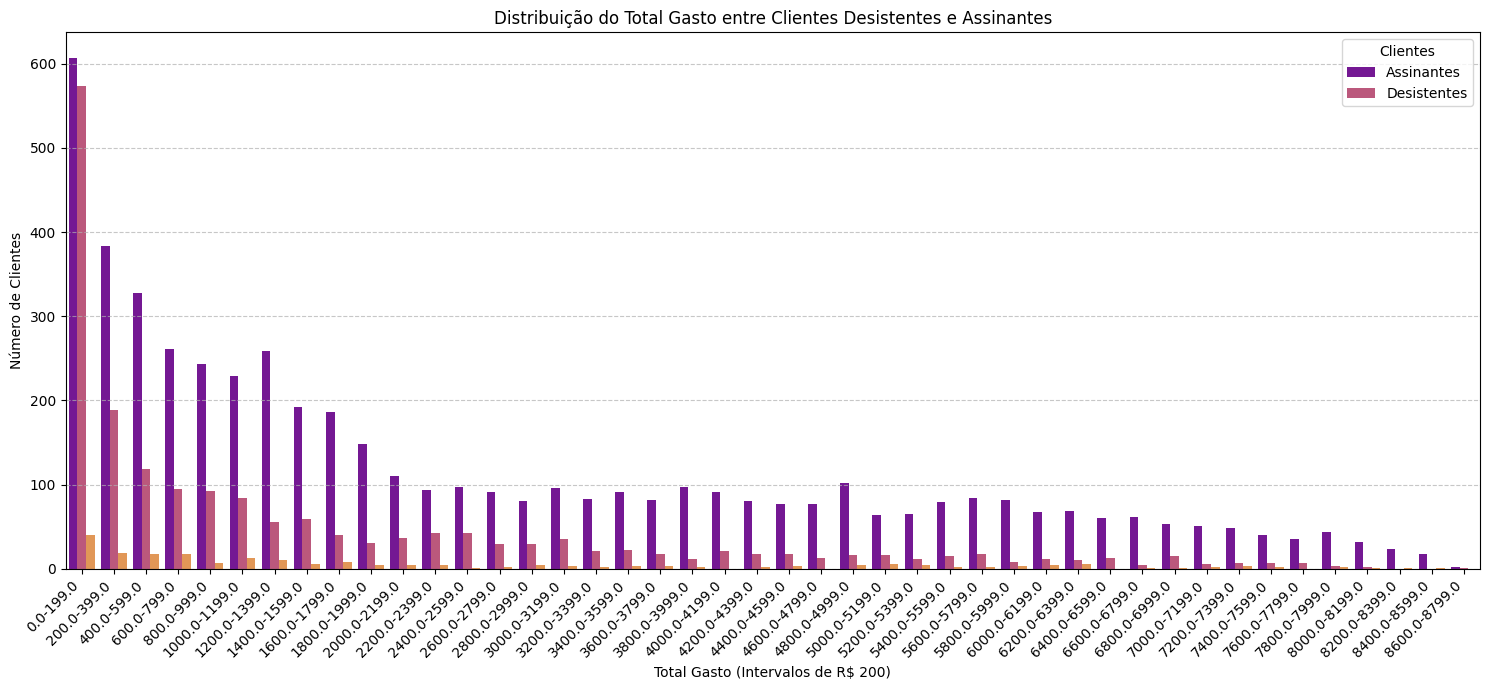

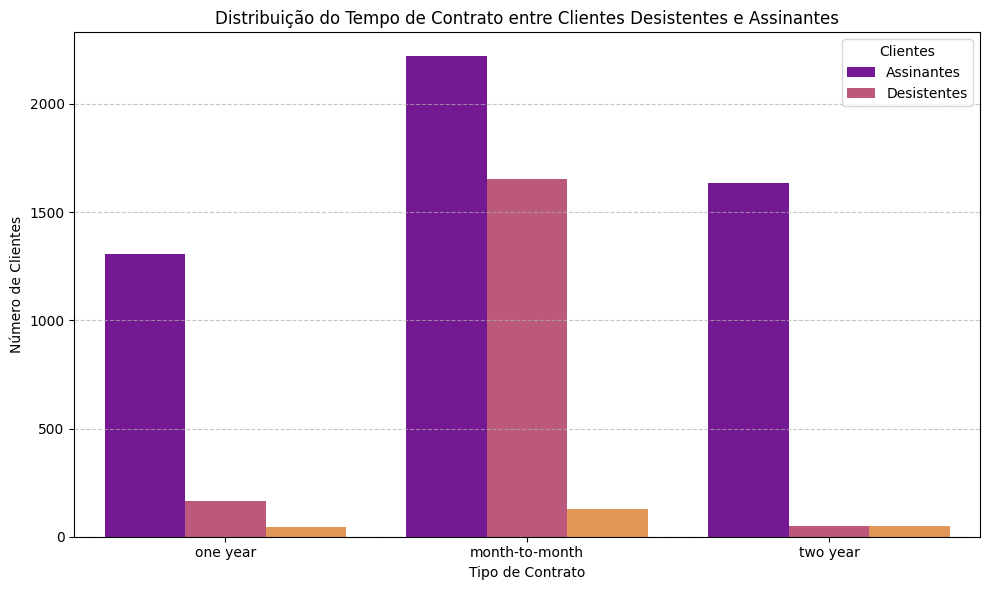

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Converter 'account.Charges.Total' para numérico, tratando erros
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'], errors='coerce')

# Remover linhas com valores NaN na coluna 'account.Charges.Total' que podem ter surgido da conversão
dados.dropna(subset=['account.Charges.Total'], inplace=True)

# Definir os intervalos para a contagem
bins = np.arange(0, dados['account.Charges.Total'].max() + 200, 200)

# Criar uma nova coluna para os intervalos de total gasto
dados['Total_Gasto_Range'] = pd.cut(dados['account.Charges.Total'], bins=bins, right=False, labels=[f'{i}-{i+199}' for i in bins[:-1]])

# Criar o gráfico de contagem
plt.figure(figsize=(15, 7))
sns.countplot(data=dados, x='Total_Gasto_Range', hue='Churn', palette= 'plasma')
plt.title('Distribuição do Total Gasto entre Clientes Desistentes e Assinantes')
plt.xlabel('Total Gasto (Intervalos de R$ 200)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clientes', loc='upper right', labels=['Assinantes', 'Desistentes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('total_gasto_churn_distribuicao.png')

plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='account.Contract', hue='Churn', palette='plasma')
plt.title('Distribuição do Tempo de Contrato entre Clientes Desistentes e Assinantes')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Clientes', loc='upper right', labels=['Assinantes', 'Desistentes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('tempo_contrato_churn_distribuicao.png')

plt.show()

In [173]:
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias,media,mediana,desvio_padrao,Total_Gasto_Range
0,0002-ORFBO,0,1,0,1,1,9,1,0,dsl,...,one year,1,mailed check,65.60,593.30,2.186667,2.157337,2.343333,1.004319,400.0-599.0
1,0003-MKNFE,0,0,0,0,0,9,1,1,dsl,...,month-to-month,0,mailed check,59.90,542.40,1.996667,2.157337,2.343333,1.004319,400.0-599.0
2,0004-TLHLJ,1,0,0,0,0,4,1,0,fiber optic,...,month-to-month,1,electronic check,73.90,280.85,2.463333,2.157337,2.343333,1.004319,200.0-399.0
3,0011-IGKFF,1,0,1,1,0,13,1,0,fiber optic,...,month-to-month,1,electronic check,98.00,1237.85,3.266667,2.157337,2.343333,1.004319,1200.0-1399.0
4,0013-EXCHZ,1,1,1,1,0,3,1,0,fiber optic,...,month-to-month,1,mailed check,83.90,267.40,2.796667,2.157337,2.343333,1.004319,200.0-399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,dsl,...,one year,0,mailed check,55.15,742.90,1.838333,2.157337,2.343333,1.004319,600.0-799.0
7263,9992-RRAMN,1,0,0,1,0,22,1,1,fiber optic,...,month-to-month,1,electronic check,85.10,1873.70,2.836667,2.157337,2.343333,1.004319,1800.0-1999.0
7264,9992-UJOEL,0,0,0,0,0,2,1,0,dsl,...,month-to-month,1,mailed check,50.30,92.75,1.676667,2.157337,2.343333,1.004319,0.0-199.0
7265,9993-LHIEB,0,0,0,1,1,67,1,0,dsl,...,two year,0,mailed check,67.85,4627.65,2.261667,2.157337,2.343333,1.004319,4600.0-4799.0


In [174]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   object  
 2   customer.gender            7256 non-null   object  
 3   customer.SeniorCitizen     7256 non-null   int64   
 4   customer.Partner           7256 non-null   object  
 5   customer.Dependents        7256 non-null   object  
 6   customer.tenure            7256 non-null   int64   
 7   phone.PhoneService         7256 non-null   object  
 8   phone.MultipleLines        7256 non-null   object  
 9   internet.InternetService   7256 non-null   object  
 10  internet.OnlineSecurity    7256 non-null   object  
 11  internet.OnlineBackup      7256 non-null   object  
 12  internet.DeviceProtection  7256 non-null   object  
 13  internet.TechSupport       7256 non-nu

In [175]:
dados['Churn'] = dados['Churn'].replace({'0': 'No', '1': 'Yes'})
dados['customer.SeniorCitizen'] = dados['customer.SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
dados['customer.Dependents'] = dados['customer.Dependents'].replace({'0': 'No', '1': 'Yes'})
dados['phone.PhoneService'] = dados['phone.PhoneService'].replace({'0': 'No', '1': 'Yes'})
dados['phone.MultipleLines'] = dados['phone.MultipleLines'].replace({'0': 'No', '1': 'Yes', 'no phone service': 'No phone service'})
dados['account.PaperlessBilling'] = dados['account.PaperlessBilling'].replace({'0': 'No', '1': 'Yes'})
dados['customer.gender'] = dados['customer.gender'].replace({'1': 'Female', '0': 'Male'})
dados['customer.Partner'] = dados['customer.Partner'].replace({'0': 'No', '1': 'Yes'})
dados['internet.OnlineSecurity'] = dados['internet.OnlineSecurity'].replace({'0': 'No', '1': 'Yes'})
dados['internet.OnlineBackup'] = dados['internet.OnlineBackup'].replace({'0': 'No', '1': 'Yes'})
dados['internet.DeviceProtection'] = dados['internet.DeviceProtection'].replace({'0': 'No', '1': 'Yes'})
dados['internet.TechSupport'] = dados['internet.TechSupport'].replace({'0': 'No', '1': 'Yes'})
dados['internet.StreamingTV'] = dados['internet.StreamingTV'].replace({'0': 'No', '1': 'Yes'})
dados['internet.StreamingMovies'] = dados['internet.StreamingMovies'].replace({'0': 'No', '1': 'Yes'})


dados['Total_Gasto_Range_Int'] = dados['Total_Gasto_Range'].astype(str).str.split('-').str[0]
dados['Total_Gasto_Range_Int'] = pd.to_numeric(dados['Total_Gasto_Range_Int'], errors='coerce').fillna(0).astype(int)

valid_churn_values = ['Yes', 'No']
dados = dados[dados['Churn'].isin(valid_churn_values)].copy()

dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_diarias,media,mediana,desvio_padrao,Total_Gasto_Range,Total_Gasto_Range_Int
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,dsl,...,Yes,mailed check,65.6,593.30,2.186667,2.157337,2.343333,1.004319,400.0-599.0,400
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,dsl,...,No,mailed check,59.9,542.40,1.996667,2.157337,2.343333,1.004319,400.0-599.0,400
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,fiber optic,...,Yes,electronic check,73.9,280.85,2.463333,2.157337,2.343333,1.004319,200.0-399.0,200
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,fiber optic,...,Yes,electronic check,98.0,1237.85,3.266667,2.157337,2.343333,1.004319,1200.0-1399.0,1200
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,fiber optic,...,Yes,mailed check,83.9,267.40,2.796667,2.157337,2.343333,1.004319,200.0-399.0,200


In [176]:
dados = dados.drop(columns=['customerID', 'Contas_diarias', 'desvio_padrao', 'media', 'mediana', 'Total_Gasto_Range', 'customer.Partner'])
display(dados.head())

,Churn,customer.gender,customer.SeniorCitizen,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total_Gasto_Range_Int
0,No,Female,No,Yes,9,Yes,No,dsl,No,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30,400
1,No,Male,No,No,9,Yes,Yes,dsl,No,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40,400
2,Yes,Male,No,No,4,Yes,No,fiber optic,No,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85,200
3,Yes,Male,Yes,No,13,Yes,No,fiber optic,No,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85,1200
4,Yes,Female,Yes,No,3,Yes,No,fiber optic,No,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40,200


In [177]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   object 
 3   customer.Dependents        7032 non-null   object 
 4   customer.tenure            7032 non-null   int64  
 5   phone.PhoneService         7032 non-null   object 
 6   phone.MultipleLines        7032 non-null   object 
 7   internet.InternetService   7032 non-null   object 
 8   internet.OnlineSecurity    7032 non-null   object 
 9   internet.OnlineBackup      7032 non-null   object 
 10  internet.DeviceProtection  7032 non-null   object 
 11  internet.TechSupport       7032 non-null   object 
 12  internet.StreamingTV       7032 non-null   object 
 13  internet.StreamingMovies   7032 non-null   object 
 1

In [178]:
#Encoding
x=dados.drop(columns=['Churn'])
y=dados['Churn']

In [179]:
x

,customer.gender,customer.SeniorCitizen,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total_Gasto_Range_Int
0,Female,No,Yes,9,Yes,No,dsl,No,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.60,593.30,400
1,Male,No,No,9,Yes,Yes,dsl,No,No,No,No,No,Yes,month-to-month,No,mailed check,59.90,542.40,400
2,Male,No,No,4,Yes,No,fiber optic,No,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.90,280.85,200
3,Male,Yes,No,13,Yes,No,fiber optic,No,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.00,1237.85,1200
4,Female,Yes,No,3,Yes,No,fiber optic,No,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.90,267.40,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,No,No,13,Yes,No,dsl,Yes,No,No,Yes,No,No,one year,No,mailed check,55.15,742.90,600
7263,Male,No,No,22,Yes,Yes,fiber optic,No,No,No,No,No,Yes,month-to-month,Yes,electronic check,85.10,1873.70,1800
7264,Male,No,No,2,Yes,No,dsl,No,Yes,No,No,No,No,month-to-month,Yes,mailed check,50.30,92.75,0
7265,Male,No,Yes,67,Yes,No,dsl,Yes,No,Yes,Yes,No,Yes,two year,No,mailed check,67.85,4627.65,4600


In [180]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [181]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [182]:

colunas = x.columns
colunas

Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Dependents',
       'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'Total_Gasto_Range_Int'],
      dtype='object')

In [183]:
one_hot = make_column_transformer((
    OneHotEncoder(drop= 'if_binary'),
    ['customer.gender', 'customer.SeniorCitizen', 'account.Contract', 'account.PaymentMethod','customer.Dependents', 'internet.InternetService', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'],
),
  remainder= 'passthrough',
  sparse_threshold=0)


In [184]:
x = one_hot.fit_transform(x)

In [185]:

one_hot.get_feature_names_out(colunas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.SeniorCitizen_Yes',
       'onehotencoder__account.Contract_month-to-month',
       'onehotencoder__account.Contract_one year',
       'onehotencoder__account.Contract_two year',
       'onehotencoder__account.PaymentMethod_bank transfer (automatic)',
       'onehotencoder__account.PaymentMethod_credit card (automatic)',
       'onehotencoder__account.PaymentMethod_electronic check',
       'onehotencoder__account.PaymentMethod_mailed check',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__internet.InternetService_0',
       'onehotencoder__internet.InternetService_dsl',
       'onehotencoder__internet.InternetService_fiber optic',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.OnlineSecurity_No',

In [186]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.SeniorCitizen_Yes,onehotencoder__account.Contract_month-to-month,onehotencoder__account.Contract_one year,onehotencoder__account.Contract_two year,onehotencoder__account.PaymentMethod_bank transfer (automatic),onehotencoder__account.PaymentMethod_credit card (automatic),onehotencoder__account.PaymentMethod_electronic check,onehotencoder__account.PaymentMethod_mailed check,onehotencoder__customer.Dependents_Yes,...,onehotencoder__internet.StreamingTV_No internet service,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_No,onehotencoder__internet.StreamingMovies_No internet service,onehotencoder__internet.StreamingMovies_Yes,onehotencoder__account.PaperlessBilling_Yes,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__Total_Gasto_Range_Int
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,9.0,65.60,593.30,400.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,400.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.0,73.90,280.85,200.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,13.0,98.00,1237.85,1200.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,3.0,83.90,267.40,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,13.0,55.15,742.90,600.0
7028,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,22.0,85.10,1873.70,1800.0
7029,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,50.30,92.75,0.0
7030,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,4600.0


In [187]:
dados = pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))
colunas_para_excluir = ['onehotencoder__phone.MultipleLines_No phone service', 'onehotencoder__internet.OnlineSecurity_No internet service', 'onehotencoder__internet.OnlineBackup_No internet service', 'onehotencoder__internet.DeviceProtection_No internet service',
                            'onehotencoder__internet.TechSupport_No internet service',
                            'onehotencoder__internet.StreamingTV_No internet service',
                            'onehotencoder__internet.StreamingMovies_No internet service']
dados = dados.drop(columns=colunas_para_excluir)
display(dados.head())

,onehotencoder__customer.gender_Male,onehotencoder__customer.SeniorCitizen_Yes,onehotencoder__account.Contract_month-to-month,onehotencoder__account.Contract_one year,onehotencoder__account.Contract_two year,onehotencoder__account.PaymentMethod_bank transfer (automatic),onehotencoder__account.PaymentMethod_credit card (automatic),onehotencoder__account.PaymentMethod_electronic check,onehotencoder__account.PaymentMethod_mailed check,onehotencoder__customer.Dependents_Yes,...,onehotencoder__internet.TechSupport_Yes,onehotencoder__internet.StreamingTV_No,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_No,onehotencoder__internet.StreamingMovies_Yes,onehotencoder__account.PaperlessBilling_Yes,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__Total_Gasto_Range_Int
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,9.0,65.6,593.30,400.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,9.0,59.9,542.40,400.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,4.0,73.9,280.85,200.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,13.0,98.0,1237.85,1200.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,3.0,83.9,267.40,200.0


In [188]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__customer.gender_Male                             7032 non-null   float64
 1   onehotencoder__customer.SeniorCitizen_Yes                       7032 non-null   float64
 2   onehotencoder__account.Contract_month-to-month                  7032 non-null   float64
 3   onehotencoder__account.Contract_one year                        7032 non-null   float64
 4   onehotencoder__account.Contract_two year                        7032 non-null   float64
 5   onehotencoder__account.PaymentMethod_bank transfer (automatic)  7032 non-null   float64
 6   onehotencoder__account.PaymentMethod_credit card (automatic)    7032 non-null   float64
 7   onehotencoder__account.PaymentMethod_electronic che

In [189]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.SeniorCitizen_Yes,onehotencoder__account.Contract_month-to-month,onehotencoder__account.Contract_one year,onehotencoder__account.Contract_two year,onehotencoder__account.PaymentMethod_bank transfer (automatic),onehotencoder__account.PaymentMethod_credit card (automatic),onehotencoder__account.PaymentMethod_electronic check,onehotencoder__account.PaymentMethod_mailed check,onehotencoder__customer.Dependents_Yes,...,onehotencoder__internet.StreamingTV_No internet service,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_No,onehotencoder__internet.StreamingMovies_No internet service,onehotencoder__internet.StreamingMovies_Yes,onehotencoder__account.PaperlessBilling_Yes,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__Total_Gasto_Range_Int
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,9.0,65.60,593.30,400.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,400.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.0,73.90,280.85,200.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,13.0,98.00,1237.85,1200.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,3.0,83.90,267.40,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,13.0,55.15,742.90,600.0
7028,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,22.0,85.10,1873.70,1800.0
7029,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2.0,50.30,92.75,0.0
7030,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,4600.0


In [190]:
#Transformando a variável alvo
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
label_ecoder = LabelEncoder()

In [193]:
y=label_ecoder.fit_transform(y)

In [194]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [195]:
pd.DataFrame(y)

,0
0,0
1,0
2,1
3,1
4,1
...,...
7027,0
7028,1
7029,0
7030,0


# Proporção de Evasão

Proporção de Evasão vs. Não Evasão:
0    73.421502
1    26.578498
Name: count, dtype: float64


/tmp/ipython-input-3561391103.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='cividis')


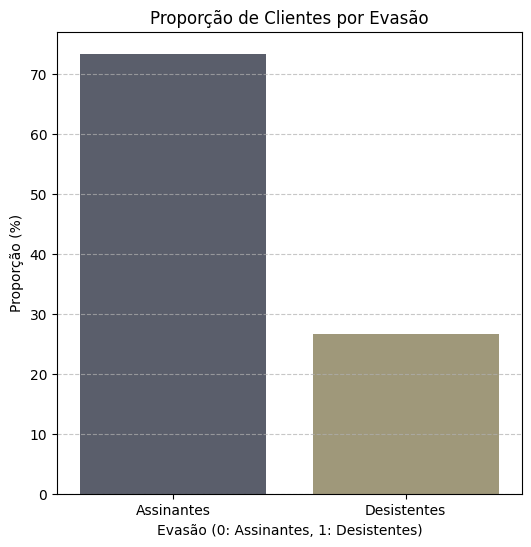

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

churn_counts = pd.Series(y).value_counts()
churn_proportion = churn_counts / len(y) * 100

print("Proporção de Evasão vs. Não Evasão:")
print(churn_proportion)

plt.figure(figsize=(6, 6))
sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='cividis')
plt.title('Proporção de Clientes por Evasão')
plt.xlabel('Evasão (0: Assinantes, 1: Desistentes)')
plt.ylabel('Proporção (%)')
plt.xticks(ticks=[0, 1], labels=['Assinantes', 'Desistentes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('proporcao_clientes_evasao.png')
plt.show()

# Análise de Correlação

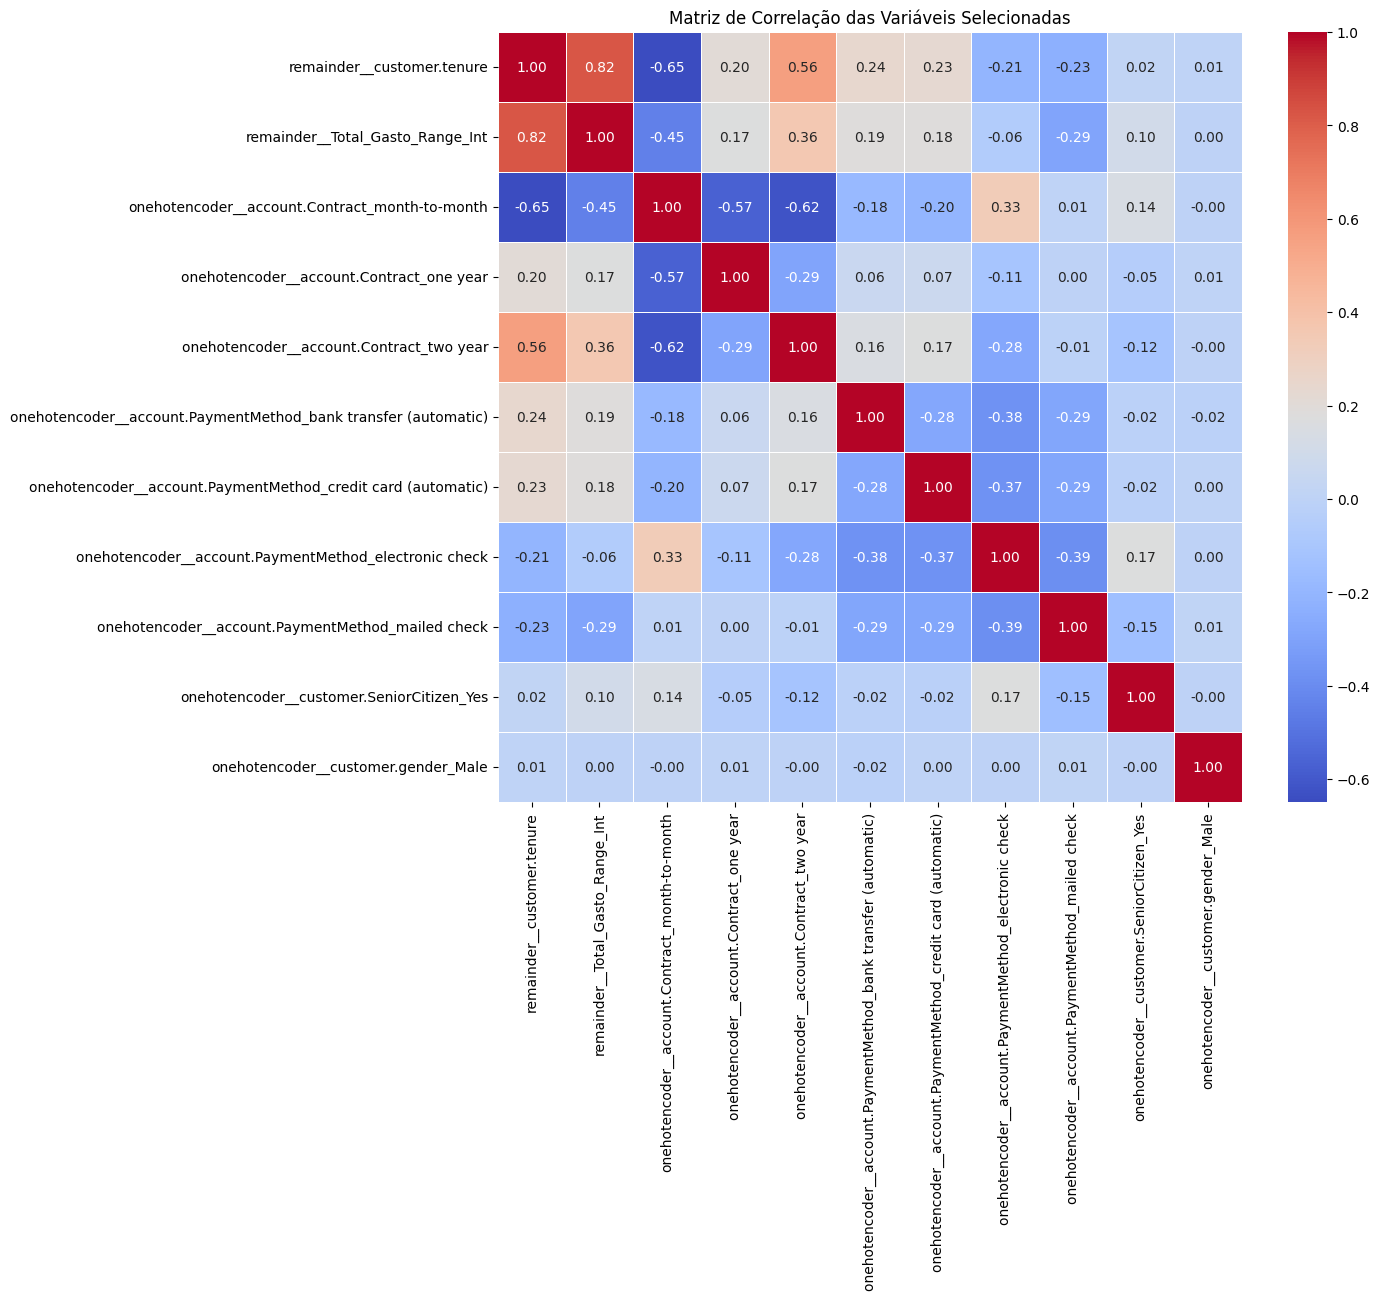

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['remainder__customer.tenure', 'remainder__Total_Gasto_Range_Int',
                    'onehotencoder__account.Contract_month-to-month', 'onehotencoder__account.Contract_one year', 'onehotencoder__account.Contract_two year',
                    'onehotencoder__account.PaymentMethod_bank transfer (automatic)', 'onehotencoder__account.PaymentMethod_credit card (automatic)',
                    'onehotencoder__account.PaymentMethod_electronic check', 'onehotencoder__account.PaymentMethod_mailed check',
                    'onehotencoder__customer.SeniorCitizen_Yes', 'onehotencoder__customer.gender_Male']

dados_selected = dados[selected_columns]

correlation_matrix_selected = dados_selected.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Selecionadas')
plt.savefig('matriz_cofusao_variaveis.png')
plt.show()


# Análises Direcionadas

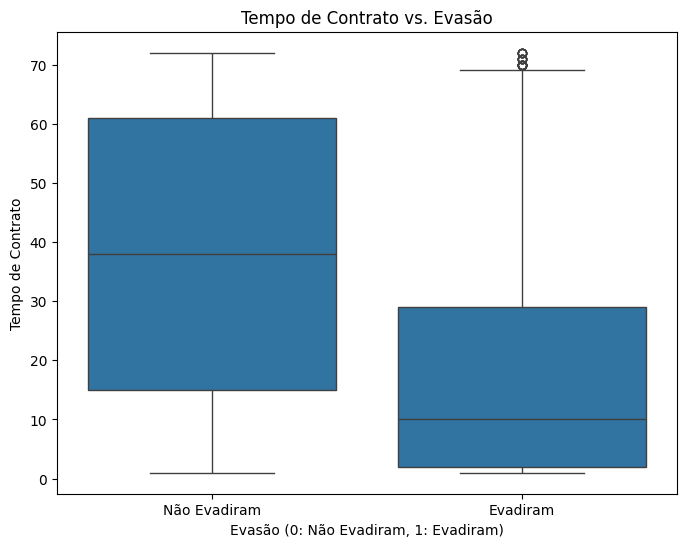

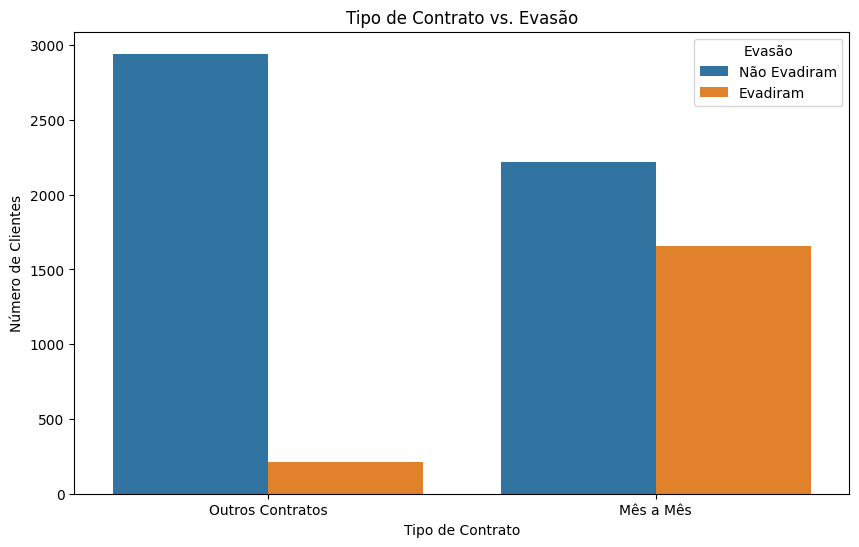

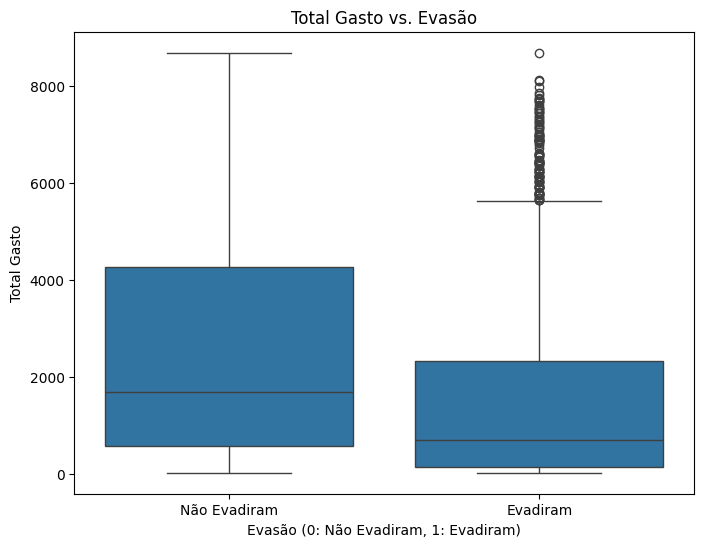

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_with_churn = dados.copy()
dados_with_churn['Churn'] = y

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='remainder__customer.tenure', data=dados_with_churn)
plt.title('Tempo de Contrato vs. Evasão')
plt.xlabel('Evasão (0: Não Evadiram, 1: Evadiram)')
plt.ylabel('Tempo de Contrato')
plt.xticks(ticks=[0, 1], labels=['Não Evadiram', 'Evadiram'])
plt.savefig('boxplot_tempocontrato.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='onehotencoder__account.Contract_month-to-month', hue='Churn', data=dados_with_churn)
plt.title('Tipo de Contrato vs. Evasão')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Outros Contratos', 'Mês a Mês'])
plt.legend(title='Evasão', loc='upper right', labels=['Não Evadiram', 'Evadiram'])
plt.savefig('countplot_tipocontrato.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='remainder__account.Charges.Total', data=dados_with_churn)
plt.title('Total Gasto vs. Evasão')
plt.xlabel('Evasão (0: Não Evadiram, 1: Evadiram)')
plt.ylabel('Total Gasto')
plt.xticks(ticks=[0, 1], labels=['Não Evadiram', 'Evadiram'])
plt.savefig('boxplot_totalgasto.png')
plt.show()


# Treino e Teste - Divisão de Dados

In [199]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print("x_treino:", x_treino.shape)
print("x_teste:", x_teste.shape)
print("y_treino:", y_treino.shape)
print("y_teste:", y_teste.shape)

x_treino: (4922, 40)
x_teste: (2110, 40)
y_treino: (4922,)
y_teste: (2110,)


# Criação de Modelos

In [200]:
from sklearn.dummy import DummyClassifier

In [201]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7341232227488151

# Árvore de Decisão

In [202]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
arvore = DecisionTreeClassifier(random_state = 42)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [204]:
arvore.predict(x_teste)

array([0, 1, 0, ..., 0, 0, 0])

In [205]:
arvore.score(x_teste, y_teste)

0.7199052132701422

In [206]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

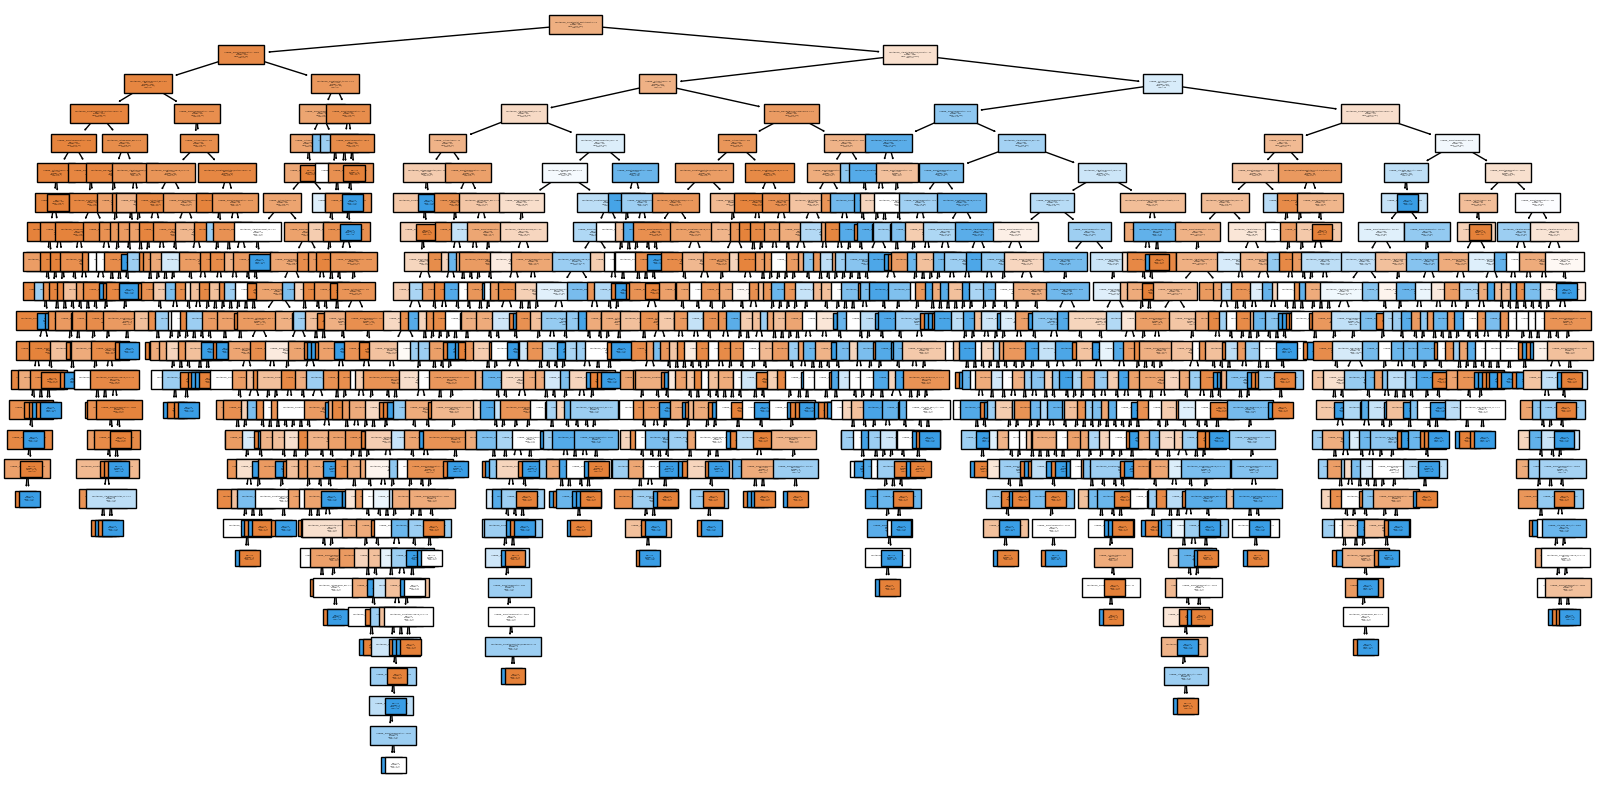

In [207]:
plt.figure(figsize = (20,10))
plot_tree(arvore, class_names= ['No', 'Yes'], filled = True, fontsize= 1, feature_names = one_hot.get_feature_names_out(colunas));
plt.savefig('arvore_decisao.png')
plt.show()

In [208]:
arvore.score(x_treino, y_treino)

0.9983746444534742

In [209]:
arvore = DecisionTreeClassifier(max_depth= 3, random_state = 42)
arvore.fit(x_treino, y_treino)

arvore = DecisionTreeClassifier(max_depth= 3, random_state = 42)
arvore.fit(x_treino, y_treino)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [210]:
arvore.score(x_treino, y_treino)

0.7905323039414872

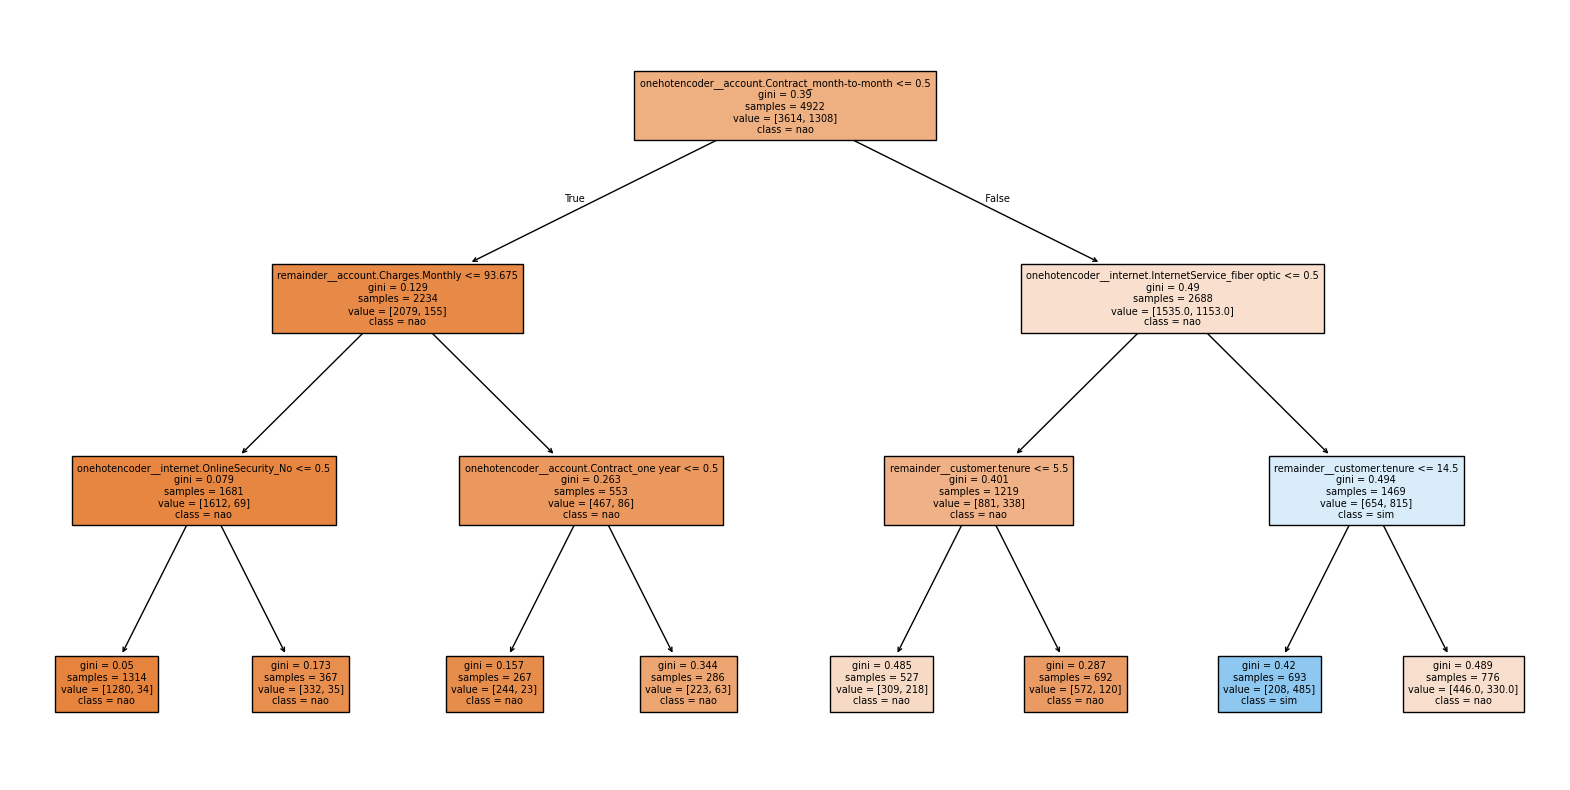

In [211]:
plt.figure(figsize = (20,10))
plot_tree(arvore, class_names= ['nao', 'sim'], filled = True, fontsize= 7, feature_names = one_hot.get_feature_names_out(colunas));
plt.savefig('arvore_decisao_decisiva.png')
plt.show()


In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [214]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.225352,0.739303,0.172663,0.162791
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.676056,0.017910,0.104350,0.093023
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.084507,0.020896,0.015209,0.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.746479,0.714428,0.566928,0.558140
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.971831,0.853234,0.834451,0.837209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.098592,0.012438,0.016219,0.000000
4918,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.915493,0.111443,0.226673,0.209302
4919,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.957746,0.629353,0.638640,0.627907
4920,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.309859,0.013930,0.048246,0.046512


In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [216]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [217]:
knn.score(x_treino_normalizado, y_treino)

0.8340105648110524

In [218]:
x_teste_normalizado = normalizacao.fit_transform(x_teste)

In [219]:
knn.score(x_teste_normalizado, y_teste)

0.7554502369668247

# Avaliação dos Modelos

In [220]:
print(f'Acurácia Dummy:{dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore:{arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN:{knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy:0.7341232227488151
Acurácia Árvore:0.7886255924170616
Acurácia KNN:0.7554502369668247


--- Dummy Classifier Metrics ---
Accuracy: 0.7341
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


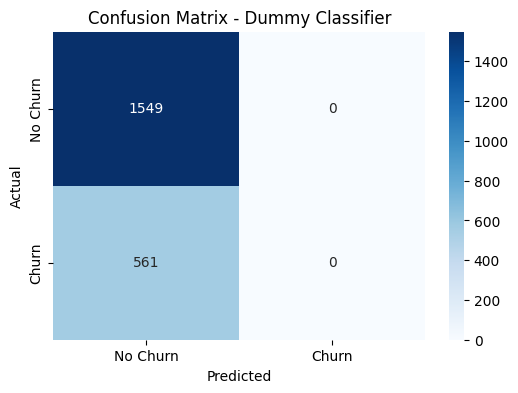


--- Decision Tree Classifier Metrics (max_depth=3) ---
Accuracy: 0.7886
Precision: 0.6923
Recall: 0.3690
F1-score: 0.4814


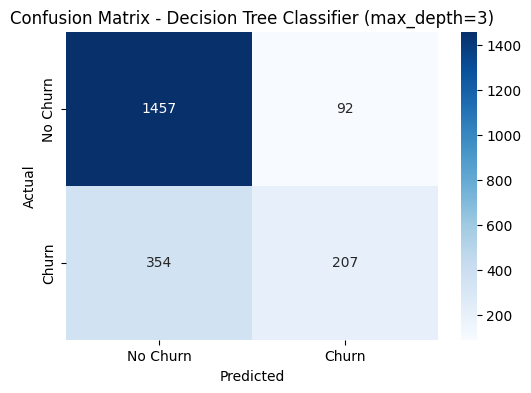


--- KNN Classifier Metrics ---
Accuracy: 0.7555
Precision: 0.5425
Recall: 0.5116
F1-score: 0.5266


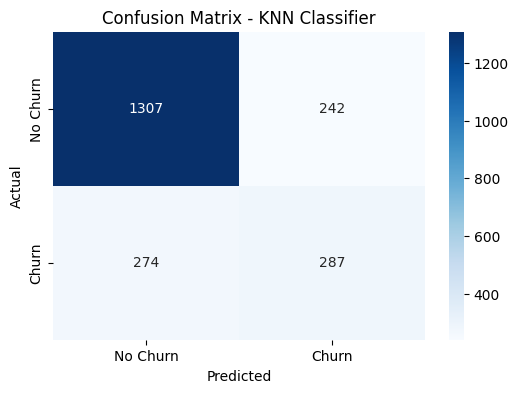

In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_dummy = dummy.predict(x_teste)
print("--- Dummy Classifier Metrics ---")
print(f"Accuracy: {accuracy_score(y_teste, y_pred_dummy):.4f}")
print(f"Precision: {precision_score(y_teste, y_pred_dummy):.4f}")
print(f"Recall: {recall_score(y_teste, y_pred_dummy):.4f}")
print(f"F1-score: {f1_score(y_teste, y_pred_dummy):.4f}")
cm_dummy = confusion_matrix(y_teste, y_pred_dummy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Dummy Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('matrizconfusao_dummy.png')
plt.show()

y_pred_arvore = arvore.predict(x_teste)
print("\n--- Decision Tree Classifier Metrics (max_depth=3) ---")
print(f"Accuracy: {accuracy_score(y_teste, y_pred_arvore):.4f}")
print(f"Precision: {precision_score(y_teste, y_pred_arvore):.4f}")
print(f"Recall: {recall_score(y_teste, y_pred_arvore):.4f}")
print(f"F1-score: {f1_score(y_teste, y_pred_arvore):.4f}")
cm_arvore = confusion_matrix(y_teste, y_pred_arvore)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_arvore, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree Classifier (max_depth=3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('matrizconfusao_arvore.png')
plt.show()

x_teste_normalizado = normalizacao.transform(x_teste) # Transform the test data using the fitted scaler
y_pred_knn = knn.predict(x_teste_normalizado)
print("\n--- KNN Classifier Metrics ---")
print(f"Accuracy: {accuracy_score(y_teste, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_teste, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_teste, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_teste, y_pred_knn):.4f}")
cm_knn = confusion_matrix(y_teste, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('matrizconfusao_knn.png')
plt.show()


In [222]:
#Melhorando os hiperparametros do KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [224]:
grid_search.fit(x_treino_normalizado, y_treino)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [225]:
grid_search.score(x_treino_normalizado, y_treino)

0.6373450619752099

Best hyperparameters found:
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

--- Best KNN Classifier Metrics ---
Accuracy: 0.7739
Precision: 0.5802
Recall: 0.5419
F1-score: 0.5604


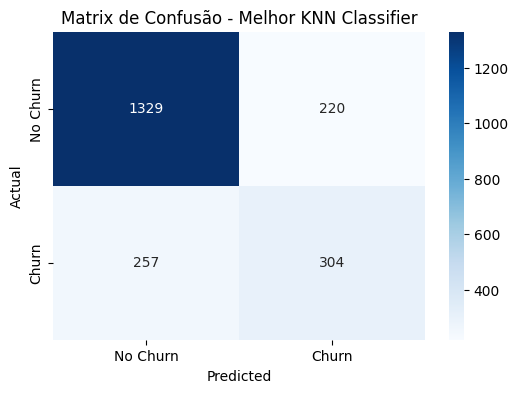

In [226]:
best_knn = grid_search.best_estimator_

print("Best hyperparameters found:")
print(grid_search.best_params_)

x_teste_normalizado = normalizacao.transform(x_teste)

y_pred_best_knn = best_knn.predict(x_teste_normalizado)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Best KNN Classifier Metrics ---")
print(f"Accuracy: {accuracy_score(y_teste, y_pred_best_knn):.4f}")
print(f"Precision: {precision_score(y_teste, y_pred_best_knn):.4f}")
print(f"Recall: {recall_score(y_teste, y_pred_best_knn):.4f}")
print(f"F1-score: {f1_score(y_teste, y_pred_best_knn):.4f}")

cm_best_knn = confusion_matrix(y_teste, y_pred_best_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matrix de Confusão - Melhor KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('matrizconfusao_bestKNN.png')
plt.show()


# Análise de Relevância das Variáveis para a Previsão de Evasão

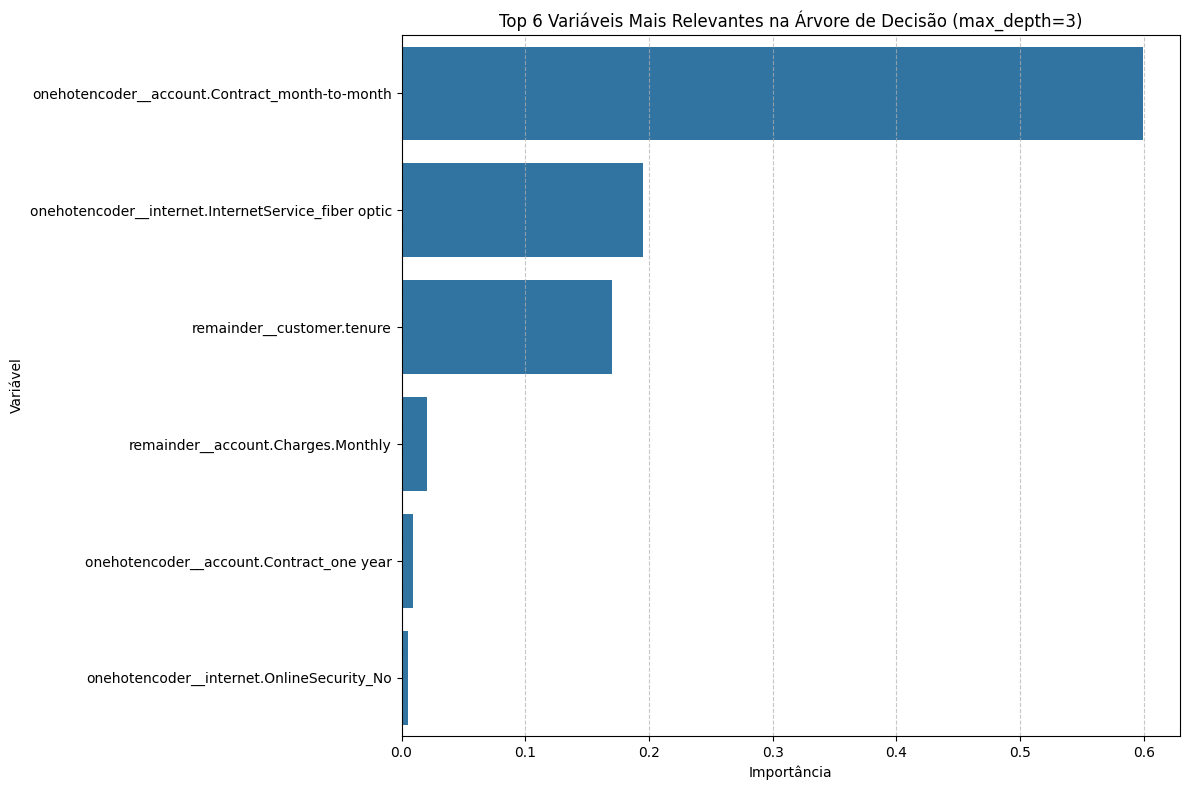

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(arvore.feature_importances_, index=one_hot.get_feature_names_out(colunas))
sorted_feature_importances = feature_importances.sort_values(ascending=False)


top_6_features = sorted_feature_importances.head(6)

plt.figure(figsize=(12, 8))

sns.barplot(x=top_6_features.values, y=top_6_features.index)
plt.title('Top 6 Variáveis Mais Relevantes na Árvore de Decisão (max_depth=3)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('barplot_variaveisimportantes_arvore.png')
plt.show()


# Relevância das Variáveis no Modelo KNN

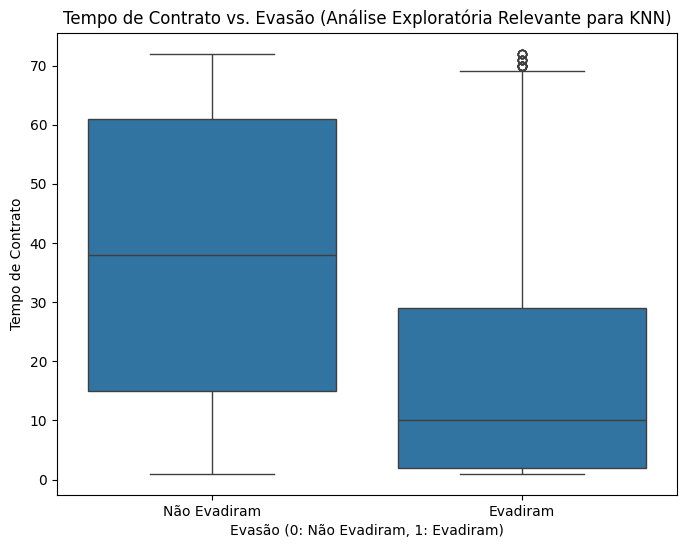

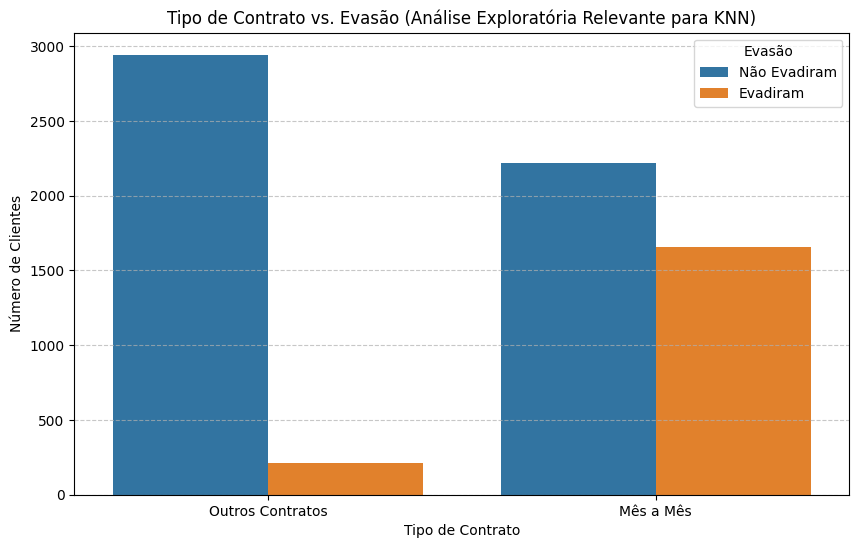

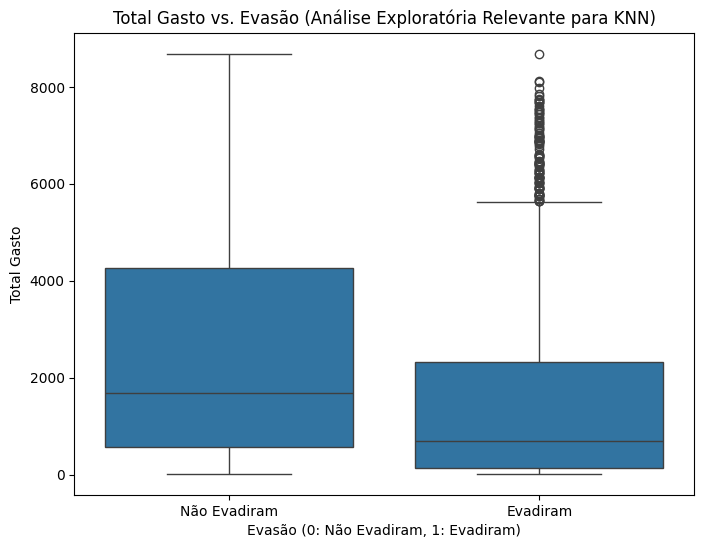

In [228]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='remainder__customer.tenure', data=dados_with_churn)
plt.title('Tempo de Contrato vs. Evasão (Análise Exploratória Relevante para KNN)')
plt.xlabel('Evasão (0: Não Evadiram, 1: Evadiram)')
plt.ylabel('Tempo de Contrato')
plt.xticks(ticks=[0, 1], labels=['Não Evadiram', 'Evadiram'])
plt.savefig('boxplot_tempocontratochurn_knn.png')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='onehotencoder__account.Contract_month-to-month', hue='Churn', data=dados_with_churn)
plt.title('Tipo de Contrato vs. Evasão (Análise Exploratória Relevante para KNN)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=[0, 1], labels=['Outros Contratos', 'Mês a Mês'])
plt.legend(title='Evasão', loc='upper right', labels=['Não Evadiram', 'Evadiram'])
plt.savefig('countplot_tipocontratochurn_knn.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='remainder__account.Charges.Total', data=dados_with_churn)
plt.title('Total Gasto vs. Evasão (Análise Exploratória Relevante para KNN)')
plt.xlabel('Evasão (0: Não Evadiram, 1: Evadiram)')
plt.ylabel('Total Gasto')
plt.xticks(ticks=[0, 1], labels=['Não Evadiram', 'Evadiram'])
plt.savefig('boxplot_totalgastochurn_knn.png')
plt.show()

### Relatório
**Fatores de Evasão de Clientes e Estratégias de Retenção**

Principais Fatores de Evasão:

A análise mostrou que a evasão de clientes (churn) está mais associada a:

1. **Tipo de contrato** – maior evasão em contratos mensais (“month-to-month”).
2. **Tempo de permanência** – clientes recentes tendem a evadir mais.
3. **Serviço de internet** – usuários de **fibra óptica** apresentam maior taxa de cancelamento.
4. **Cobrança mensal** – valores altos aumentam risco de churn.
5. **Total gasto** – clientes com baixo gasto acumulado tendem a sair.
6. **Serviços adicionais** – ausência de suporte e segurança online eleva evasão.

### Desempenho dos Modelos

* **Dummy Classifier**: 73,4% de acurácia (linha de base).
* **Árvore de Decisão**: 78,9% de acurácia, mas baixo recall (36,9%).
* **KNN Inicial**: 75,5% de acurácia, F1 de 52,7% (algum overfitting).
* **KNN Ajustado**: melhor modelo para identificar churn, com recall de 54,2% e F1 de 56,0%.

### Estratégias de Retenção

1. **Contratos mensais** → oferecer incentivos para migração a planos mais longos.
2. **Novos clientes** → programas de boas-vindas e acompanhamento inicial.
3. **Fibra óptica** → investigar causas da insatisfação e melhorar qualidade.
4. **Cobranças** → tornar tarifas mais claras e competitivas, oferecer pacotes promocionais.
5. **Serviços adicionais** → incentivar adesão a segurança online e suporte técnico (inclusive via pacotes ou testes grátis).
6. **Monitoramento preditivo** → usar o **KNN Ajustado** para prever risco e agir de forma proativa com ofertas e suporte personalizado.

**Conclusão**

A evasão é um desafio relevante, mas pode ser reduzida com foco nos clientes mais vulneráveis (contratos mensais, baixa permanência, altos custos e fibra óptica). A aplicação de modelos preditivos e estratégias direcionadas fortalece a retenção e melhora a saúde da base de clientes.

